# Acoustics and audition
[3]

LING 497 Phonetic Analysis: Articulation, Acoustics, Audition

The Pennsylvania State University

[Prof. Deborah Morton](https://deborahcmorton.wordpress.com/)

---

```{admonition} Revised
25 May 2023
```
```{contents}
```

---

## Vowel Spectrograms

````{tab-set}
```{tab-item} hæd
![](img/L3_00.png)
```
```{tab-item} bæt
![](img/L3_09.png)
```
```{tab-item} hɛd
![](img/L3_01.png)
```
```{tab-item} bɛd
![](img/L3_10.png)
```
```{tab-item} hid
![](img/L3_02.png)
```
```{tab-item} bid
![](img/L3_11.png)
```
```{tab-item} hɪd
![](img/L3_03.png)
```
```{tab-item} bɪd
![](img/L3_12.png)
```
```{tab-item} hɑd
![](img/L3_04.png)
```
```{tab-item} bɑd
![](img/L3_13.png)
```
```{tab-item} hʊd
![](img/L3_05.png)
```
```{tab-item} bʊk
![](img/L3_14.png)
```
```{tab-item} hʌd
![](img/L3_06.png)
```
```{tab-item} bʌd
![](img/L3_15.png)
```
```{tab-item} hud
![](img/L3_07.png)
```
```{tab-item} bud
![](img/L3_16.png)
```
```{tab-item} hɔd
![](img/L3_08.png)
```
```{tab-item} bɔt
![](img/L3_17.png)
```
````

---

## Formant Data

### Observations

In [6]:
import numpy  as np
import pandas as pd

obs = pd.DataFrame(
  data=[
    ['hæd','æ',772.2623598361888 ,1731.6866205977226],
    ['hɛd','ɛ',574.208631287283  ,1918.637682685363 ],
    ['hid','i',305.92339403193955,2458.4996663060283],
    ['hɪd','ɪ',453.5730951234637 ,2072.92348845572  ],
    ['hɑd','ɑ',714.6610521359538 ,1214.4713341175295],
    ['hʊd','ʊ',476.80292121316353,1338.2178121189354],
    ['hʌd','ʌ',618.9116494455797 ,1425.8562296798175],
    ['hud','u',318.0286268276335 ,1095.993125792178 ],
    ['hɔd','ɔ',610.8859754665131 ,935.5714048615686 ],
    ['bæt','æ',812.4152837356295 ,1702.1079409783133],
    ['bɛd','ɛ',534.3448157343192 ,1891.7585442888867],
    ['bid','i',289.82041231188634,2429.2999144902774],
    ['bɪd','ɪ',450.1635653561586 ,2009.4880143110365],
    ['bɑd','ɑ',708.1091727260111 ,1189.9926250011079],
    ['bʊk','ʊ',497.65304819673605,1020.9113547201716],
    ['bʌd','ʌ',606.6914116015801 ,1372.059084614637 ],
    ['bud','u',323.43445114657317,1264.2416721859588],
    ['bɔt','ɔ',636.7402932330717 ,994.824262278683  ],
  ],
  columns=[
  'word',
  'vowel',
  'F1_Hz',
  'F2_Hz',
  ],
)
obs.drop(columns=['word'])   \
  .set_index(keys=['vowel']) \
  .to_csv('lab3_obs.csv')
obs.round(2)

,word,vowel,F1_Hz,F2_Hz
0,hæd,æ,772.26,1731.69
1,hɛd,ɛ,574.21,1918.64
2,hid,i,305.92,2458.50
3,hɪd,ɪ,453.57,2072.92
4,hɑd,ɑ,714.66,1214.47
5,hʊd,ʊ,476.80,1338.22
6,hʌd,ʌ,618.91,1425.86
7,hud,u,318.03,1095.99
8,hɔd,ɔ,610.89,935.57
9,bæt,æ,812.42,1702.11


### Averages [Hz, acoustic frequency]

In [8]:
avg = obs.drop(columns=['word']) \
  .groupby(by=['vowel'])         \
  .mean()                        \
  .round(2)
avg.to_csv('lab3_avg.csv')
avg

,F1_Hz,F2_Hz
vowel,,
i,297.87,2443.90
u,320.73,1180.12
æ,792.34,1716.90
ɑ,711.39,1202.23
ɔ,623.81,965.20
ɛ,554.28,1905.20
ɪ,451.87,2041.21
ʊ,487.23,1179.56
ʌ,612.80,1398.96


### Averages [barks, auditory frequency]

$
\begin{aligned}
\text{bark}=6\sinh^{-1}\left(\frac{f}{600}\right)
\end{aligned}
$

In [10]:
def freq_to_bark (freq : float) -> float:
  bark = 6*np.arcsinh(freq/600)
  return bark

avg['F1_bark'] = avg['F1_Hz'].apply(freq_to_bark)
avg['F2_bark'] = avg['F2_Hz'].apply(freq_to_bark)
avg.drop(columns=['F1_Hz','F2_Hz']).to_csv('lab3_bark.csv')
avg.drop(columns=['F1_Hz','F2_Hz'])

,F1_bark,F2_bark
vowel,,
i,2.868206,12.673842
u,3.071393,8.572313
æ,6.545572,10.642287
ɑ,6.040524,8.671778
ɔ,5.454945,7.521406
ɛ,4.958718,11.234881
ɪ,4.173832,11.630689
ʊ,4.452301,8.569775
ʌ,5.378270,9.496836


---

## Plotting the data using R

In [1]:
.libPaths()

[1] "/Library/Frameworks/R.framework/Versions/4.2-arm64/Resources/library"

In [2]:
packages <- c(
  'ggplot2',
  'readr',
  'dplyr',
  'tidyverse',
  'scales',
  'repr',
  'phonR',
  'vowels',
  'magrittr'
)

# Install packages not yet installed
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {
  install.packages(packages[!installed_packages])
}

# Load packages
invisible(lapply(packages, library, character.only = TRUE))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.7     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




---

### Observations [Hz]

In [4]:
obs <- read.csv('lab3_obs.csv')
obs

vowel,F1_Hz,F2_Hz
<chr>,<dbl>,<dbl>
æ,772.2624,1731.6866
ɛ,574.2086,1918.6377
i,305.9234,2458.4997
ɪ,453.5731,2072.9235
ɑ,714.6611,1214.4713
ʊ,476.8029,1338.2178
ʌ,618.9116,1425.8562
u,318.0286,1095.9931
ɔ,610.8860,935.5714


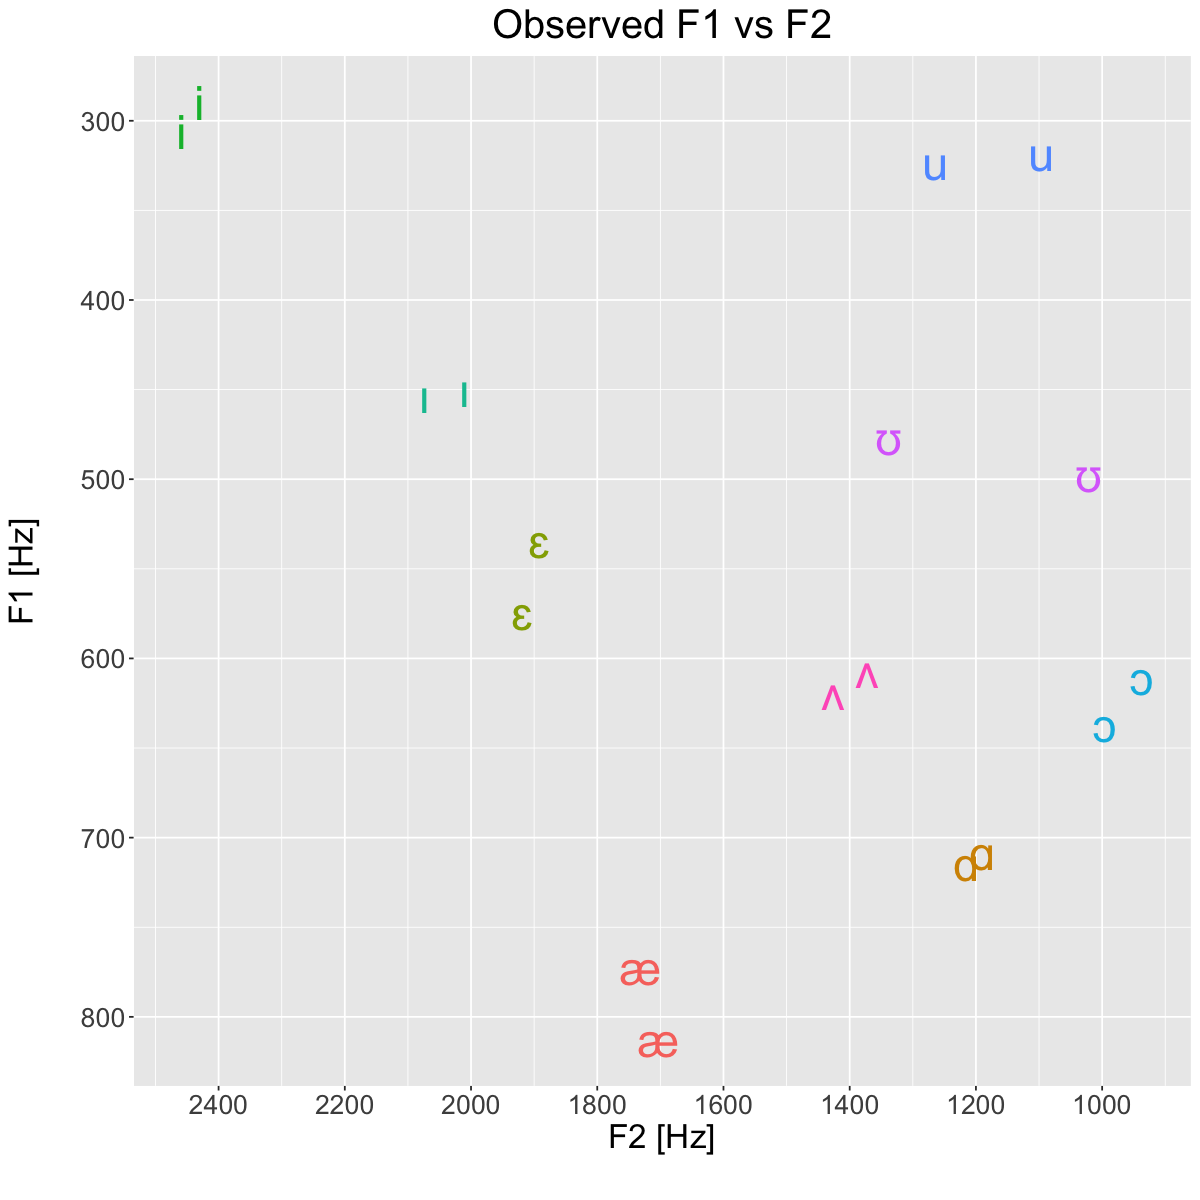

In [35]:
options(repr.plot.width=10, repr.plot.height=10)

plt <- ggplot(obs, aes(x=F2_Hz, y=F1_Hz, label=vowel, color=vowel)) +
  geom_text(size=10) +
  scale_x_reverse(
      position='bottom',
      breaks=seq(0, 3000, 200)) +
  scale_y_reverse(
      position='left',
      breaks=seq(0, 1000, 100)) +
  labs(
    x='F2 [Hz]\n',
    y='F1 [Hz]\n',
    title='Observed F1 vs F2') +
  theme(
    legend.position='none',
    plot.title=element_text(hjust=0.5),
    text=element_text(size=20)
  )

suppressWarnings(print(plt))

---

### Averages [Hz]

In [21]:
avg <- read.csv('lab3_avg.csv')
avg

vowel,F1_Hz,F2_Hz
<chr>,<dbl>,<dbl>
i,297.87,2443.90
u,320.73,1180.12
æ,792.34,1716.90
ɑ,711.39,1202.23
ɔ,623.81,965.20
ɛ,554.28,1905.20
ɪ,451.87,2041.21
ʊ,487.23,1179.56
ʌ,612.80,1398.96


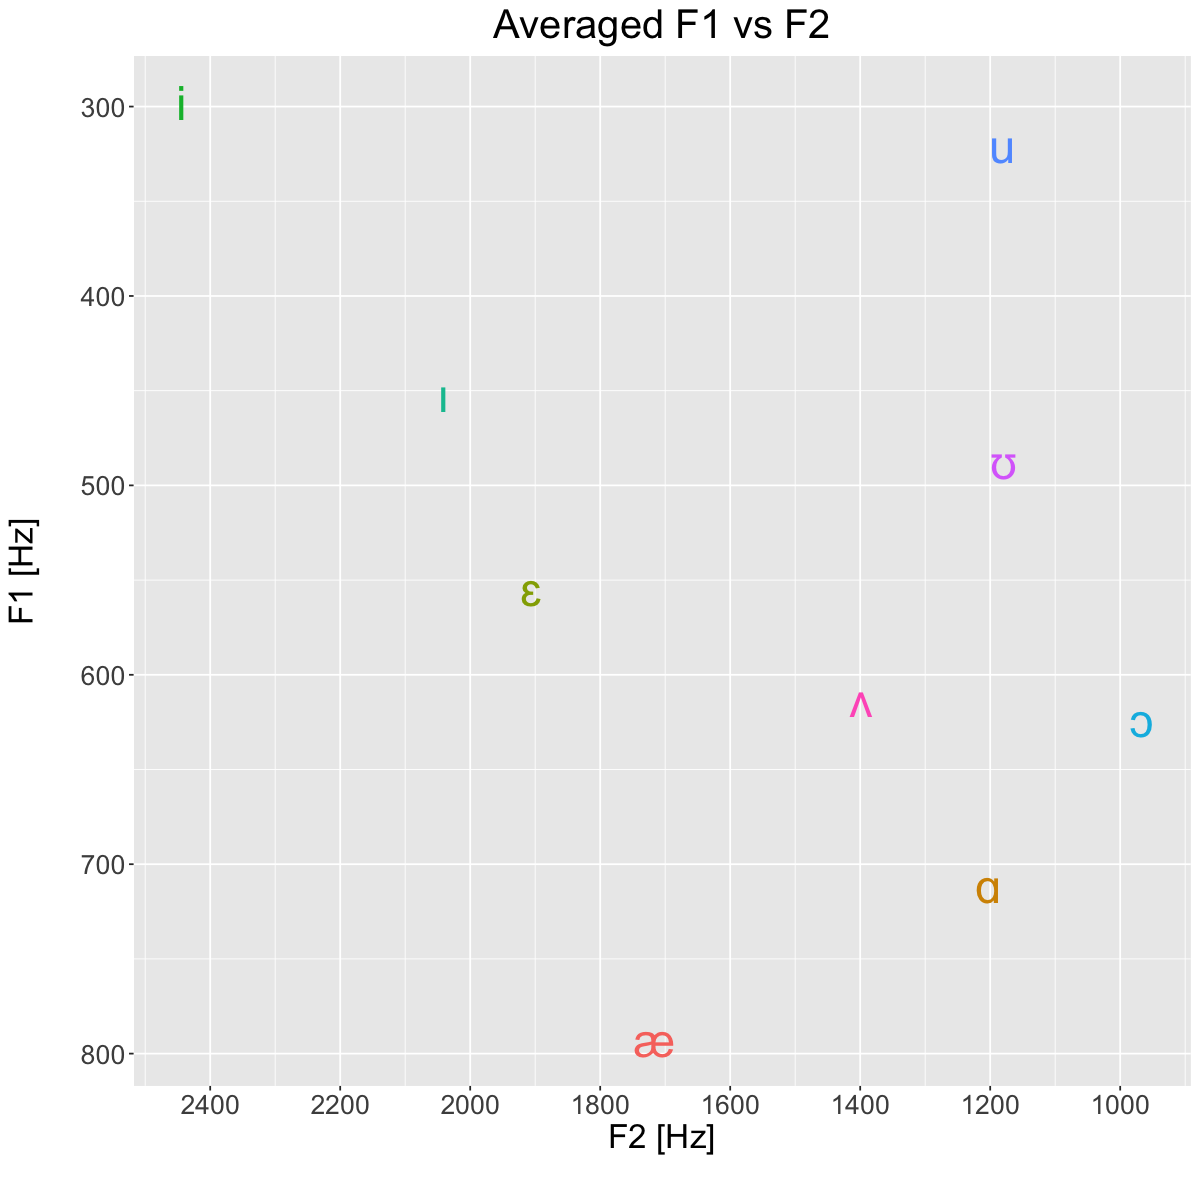

In [34]:
options(repr.plot.width=10, repr.plot.height=10)

plt <- ggplot(avg, aes(x=F2_Hz, y=F1_Hz, label=vowel, color=vowel)) +
  geom_text(size=10) +
  scale_x_reverse(
      position='bottom',
      breaks=seq(0, 3000, 200)) +
  scale_y_reverse(
      position='left',
      breaks=seq(0, 1000, 100)) +
  labs(
    x='F2 [Hz]\n',
    y='F1 [Hz]\n',
    title='Averaged F1 vs F2') +
  theme(
    legend.position='none',
    plot.title=element_text(hjust=0.5),
    text=element_text(size=20)
  )

suppressWarnings(print(plt))

---

### Averages [barks]

In [36]:
barks <- read.csv('lab3_bark.csv')
barks

vowel,F1_bark,F2_bark
<chr>,<dbl>,<dbl>
i,2.868206,12.673842
u,3.071393,8.572313
æ,6.545572,10.642287
ɑ,6.040524,8.671778
ɔ,5.454945,7.521406
ɛ,4.958718,11.234881
ɪ,4.173832,11.630689
ʊ,4.452301,8.569775
ʌ,5.378270,9.496836


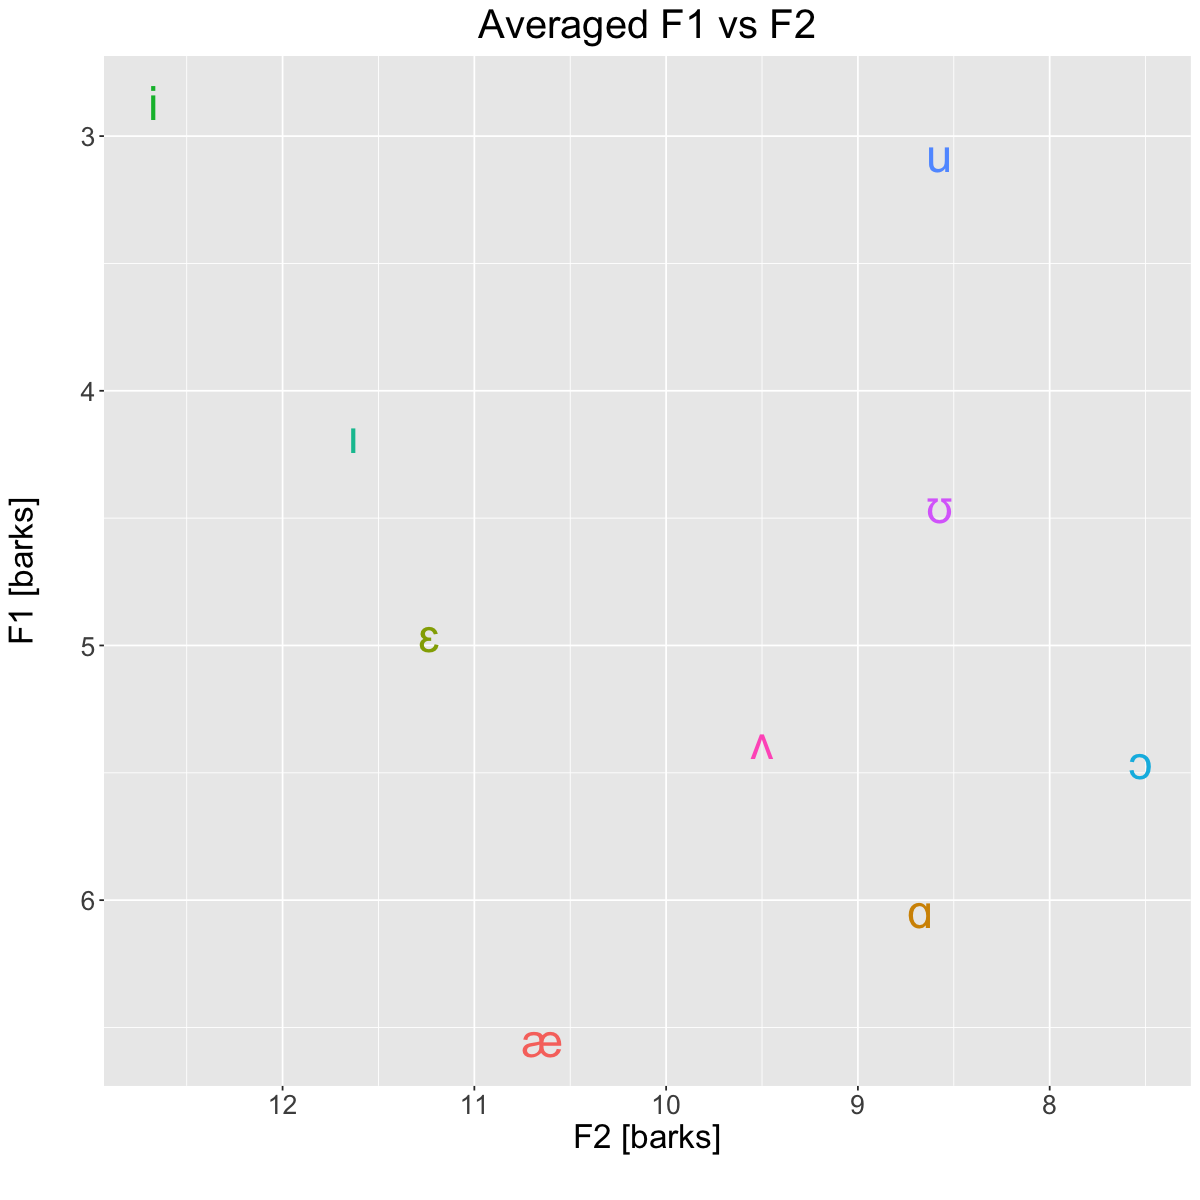

In [41]:
options(repr.plot.width=10, repr.plot.height=10)

plt <- ggplot(barks, aes(x=F2_bark, y=F1_bark, label=vowel, color=vowel)) +
  geom_text(size=10) +
  scale_x_reverse(
      position='bottom') +
  scale_y_reverse(
      position='left') +
  labs(
    x='F2 [barks]\n',
    y='F1 [barks]\n',
    title='Averaged F1 vs F2') +
  theme(
    legend.position='none',
    plot.title=element_text(hjust=0.5),
    text=element_text(size=20)
  )

suppressWarnings(print(plt))

---

### Hz vs Barks

````{tab-set}
```{tab-item} Hz
![](img/L3_hertz.png)
```
```{tab-item} barks
![](img/L3_barks.png)
```
````

---

## Simulating a larger data set

In [42]:
set.seed(10)

In [43]:
vowels = data.frame(
       vowel = rep(c('a', 'e', 'i', 'o', 'u'), each=50),
       F1 = c(rnorm(50, mean=800, sd=100),
              rnorm(50, mean=600, sd=100),
              rnorm(50, mean=350, sd=100),
              rnorm(50, mean=600, sd=100),
              rnorm(50, mean=350, sd=100)),
       F2 = c(rnorm(50, mean=1500, sd=150),
              rnorm(50, mean=2000, sd=150),
              rnorm(50, mean=2500, sd=150),
              rnorm(50, mean=1000, sd=150),
              rnorm(50, mean=800, sd=150))
)
vowels

vowel,F1,F2
<chr>,<dbl>,<dbl>
a,801.8746,1661.684
a,781.5747,1639.767
a,662.8669,1280.881
a,740.0832,1364.089
a,829.4545,1397.948
a,838.9794,1659.475
a,679.1924,1396.138
a,763.6324,1329.956
a,637.3327,1335.808


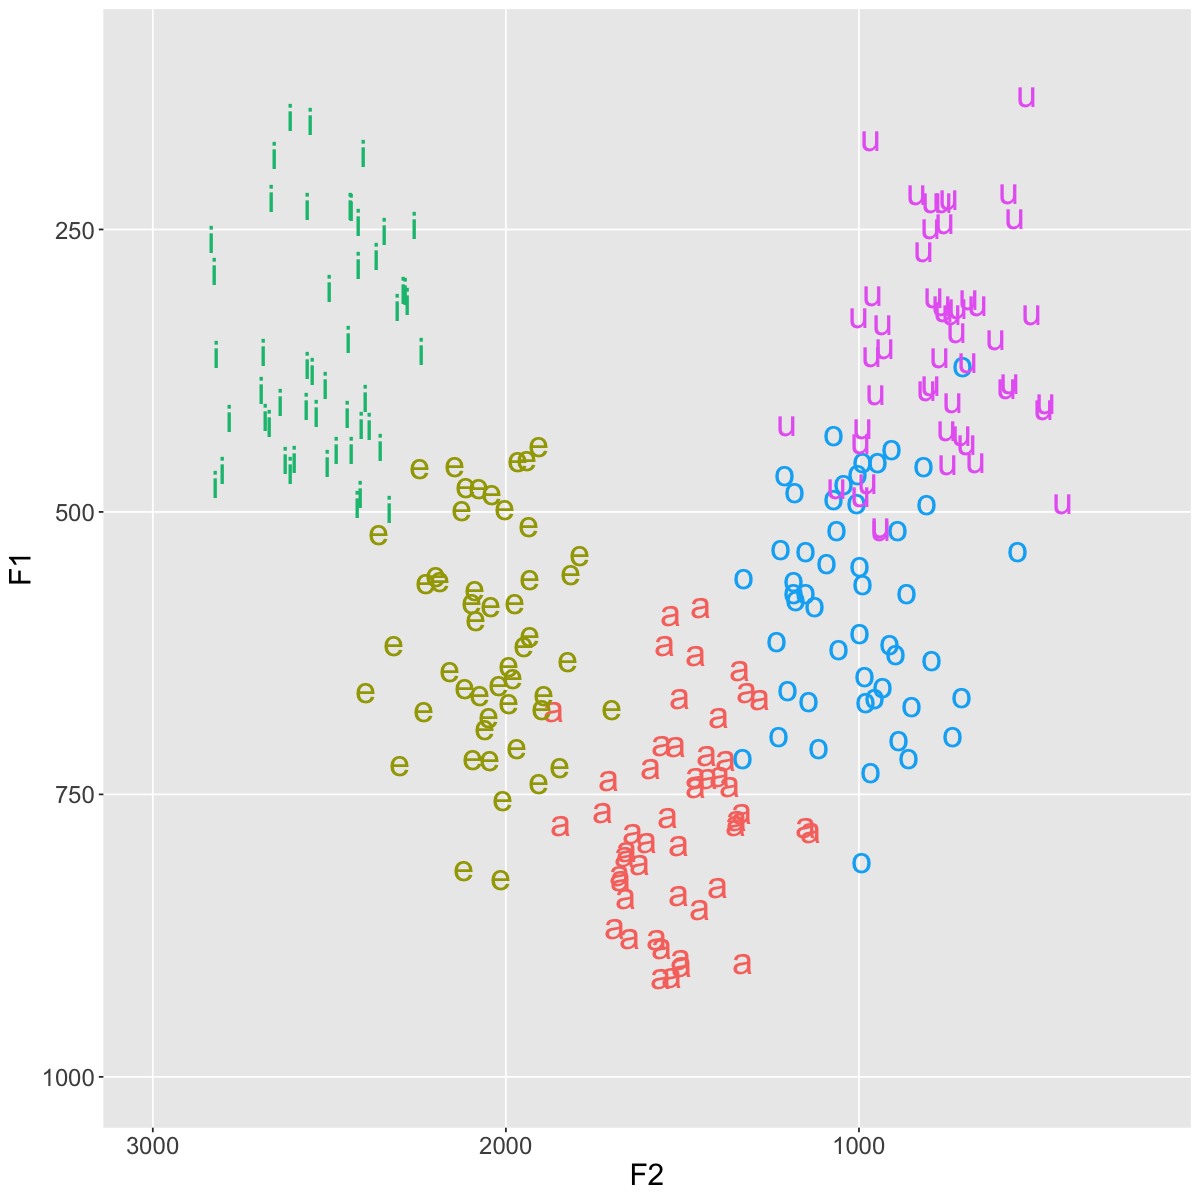

In [47]:
options(repr.plot.width=10, repr.plot.height=10)

plt <- ggplot(data=vowels, aes(x=F2, y=F1, color=vowel, label=vowel))+
geom_text(size=8)+
coord_cartesian(
    xlim=c(3000, 200),
    ylim=c(1000, 100))+
theme(
    legend.position='none',
    plot.title=element_text(hjust=0.5),
    text=element_text(size=18))
plt

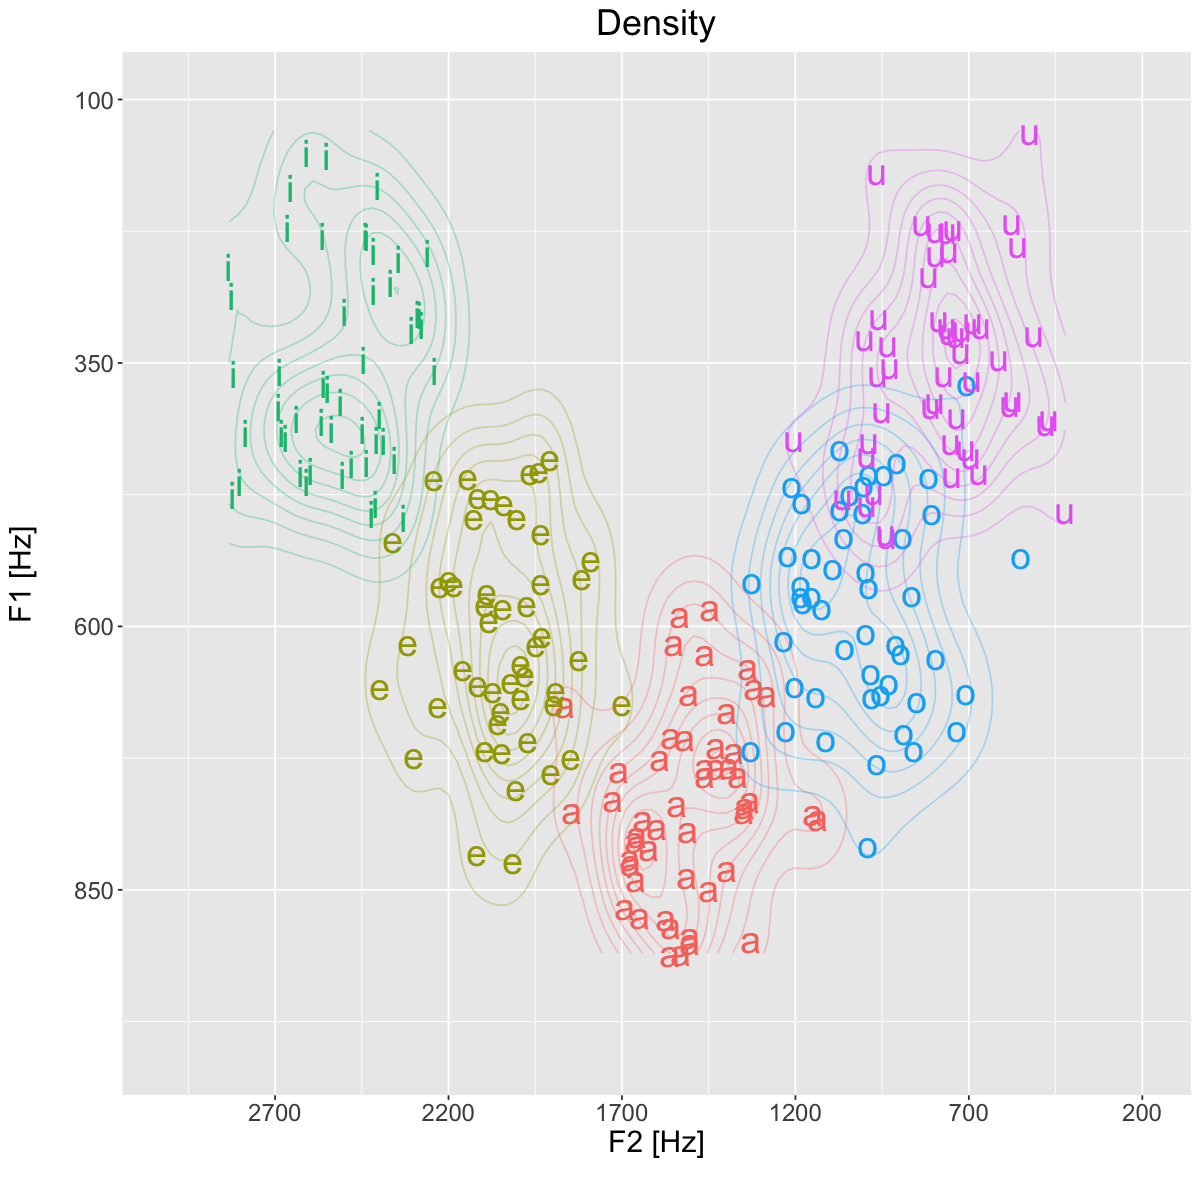

In [50]:
options(repr.plot.width=10, repr.plot.height=10)

plt <- ggplot(data=vowels, aes(x=F2, y=F1, color=vowel, label=vowel))+
geom_text(size=8)+
scale_x_reverse(
    position='bottom',
    breaks=seq(200, 3000, 500))+
scale_y_reverse(
    position='left',
    breaks=seq(100, 1000, 250))+
labs(
    x='F2 [Hz]\n',
    y='F1 [Hz]\n',
    title='Density')+
geom_density_2d(alpha=0.3)+
coord_cartesian(
    xlim=c(3000, 200),
    ylim=c(1000, 100))+
theme(
    legend.position='none',
    plot.title=element_text(hjust=0.5),
    text=element_text(size=18))
plt

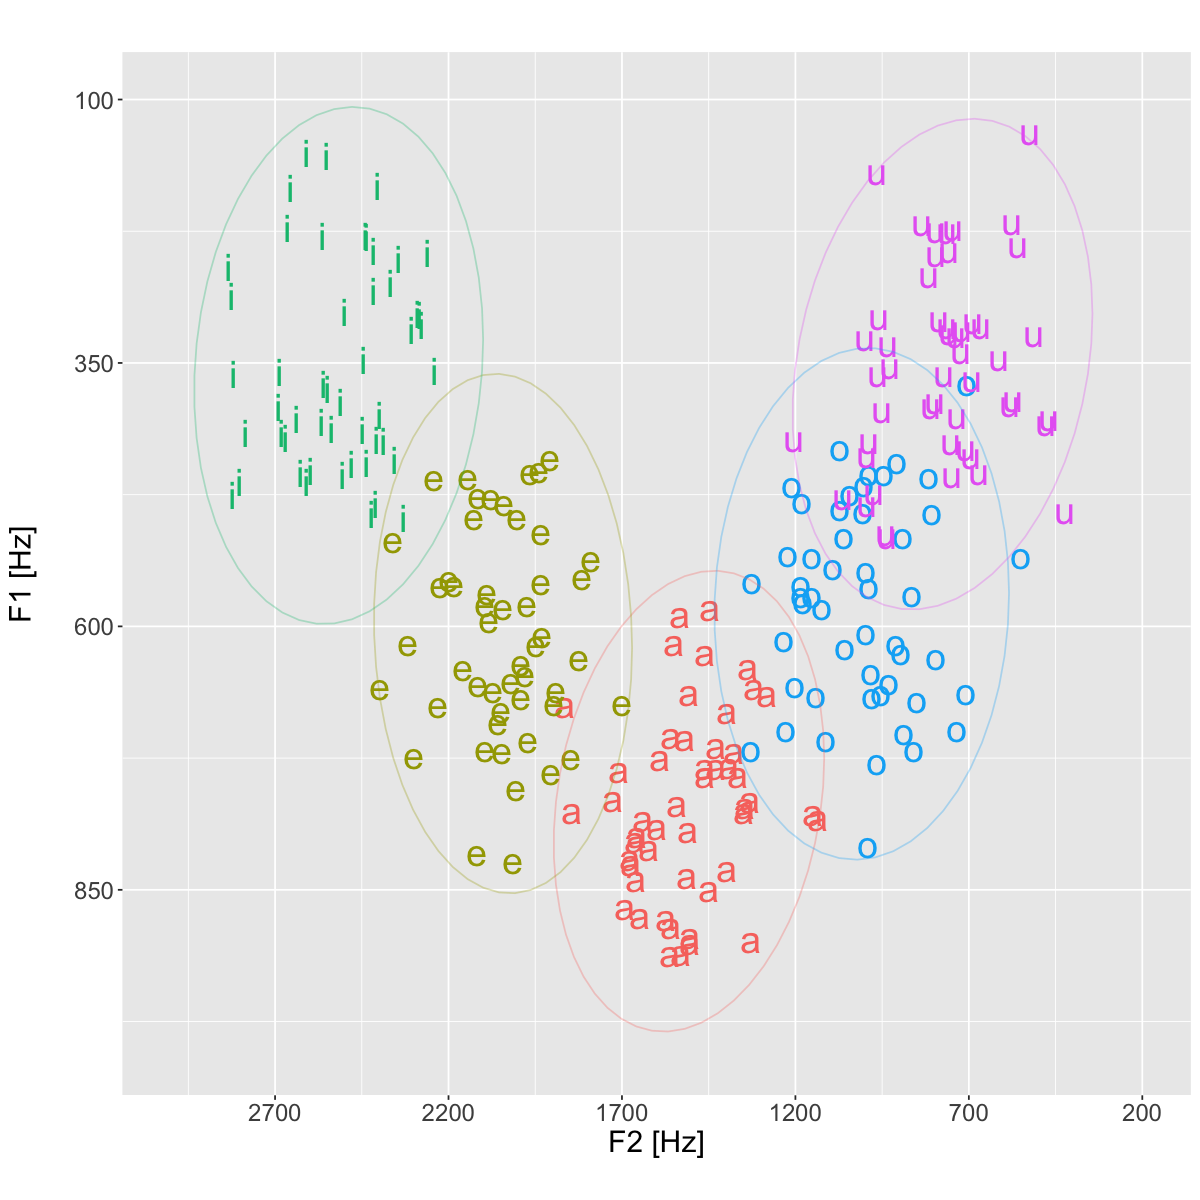

In [52]:
options(repr.plot.width=10, repr.plot.height=10)

plt <- ggplot(data=vowels, aes(x=F2, y=F1, color=vowel, label=vowel))+
geom_text(size=8)+
scale_x_reverse(
    position='bottom',
    breaks=seq(200, 3000, 500))+
scale_y_reverse(
    position='left',
    breaks=seq(100, 1000, 250))+
labs(
    x='F2 [Hz]\n',
    y='F1 [Hz]\n',
    title='')+
stat_ellipse(type='norm', alpha=0.3)+
coord_cartesian(
    xlim=c(3000, 200),
    ylim=c(1000, 100))+
theme(
    legend.position='none',
    plot.title=element_text(hjust=0.5),
    text=element_text(size=18))
plt

In [53]:
means <- vowels %>% group_by(vowel) %>% summarize(meanF1=mean(F1),
                                                  meanF2=mean(F2),
                                                  seF1=sd(F1)/sqrt(n()),
                                                  seF2=sd(F2)/sqrt(n()))
means

vowel,meanF1,meanF2,seF1,seF2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
a,765.8705,1506.9400,12.25285,21.84624
e,606.8198,2042.9371,13.81097,20.84642
i,352.4042,2516.7145,13.74746,23.33361
o,578.6033,1008.8288,13.60189,23.78942
u,351.1237,776.0376,13.04699,24.21912


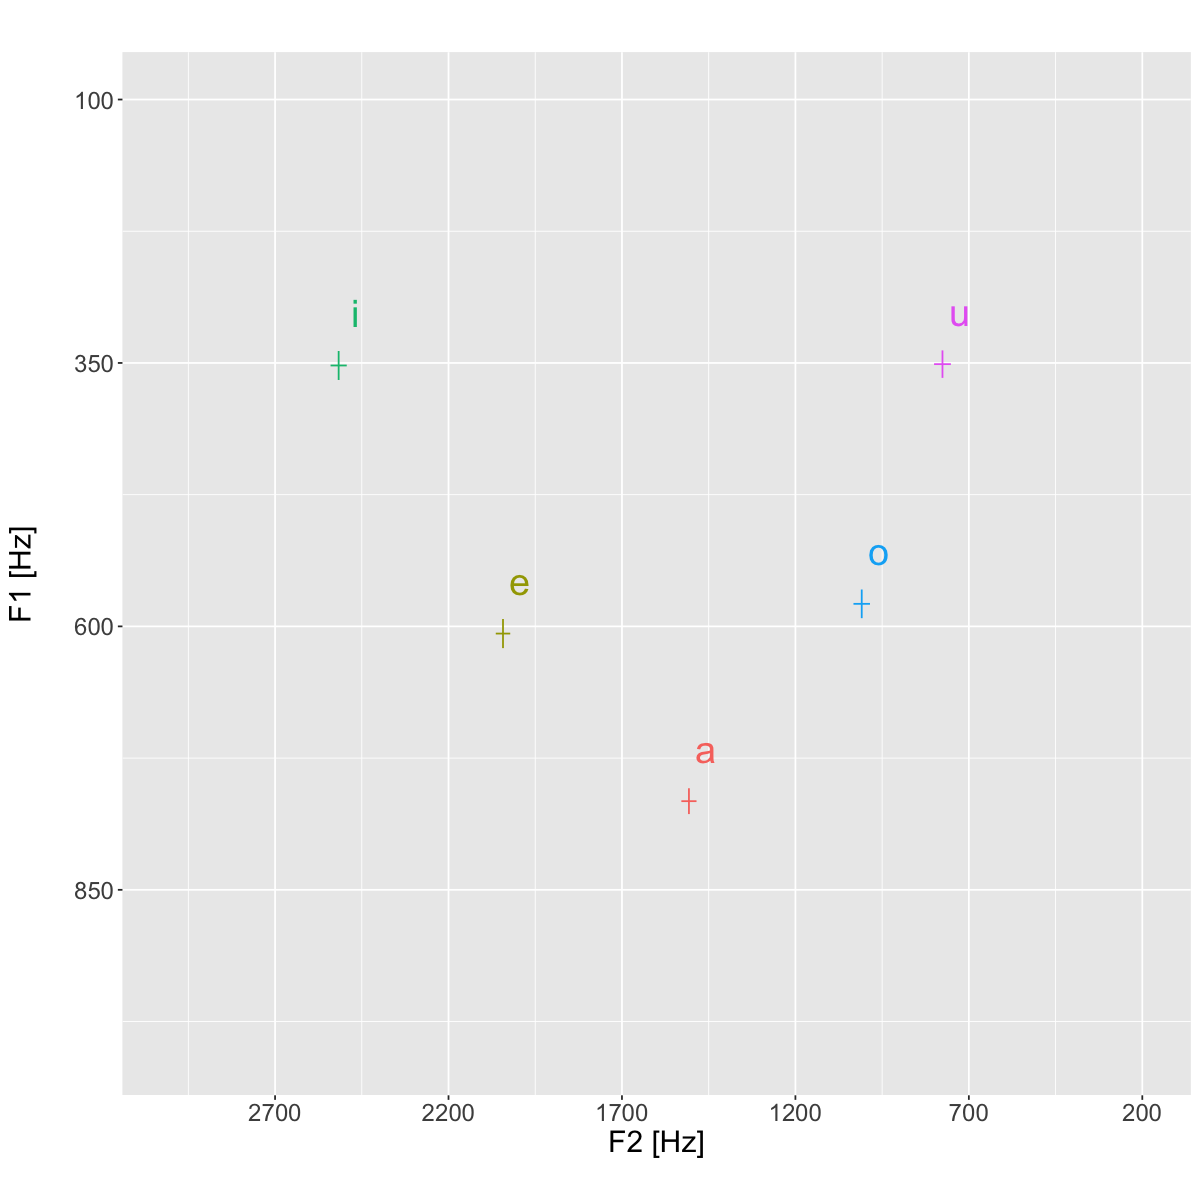

In [55]:
options(repr.plot.width=10, repr.plot.height=10)

plt <- ggplot(data=means, aes(x=meanF2, y=meanF1, color=vowel, label=vowel))+
geom_errorbar(aes(ymin=meanF1-seF1, ymax=meanF1+seF1), width=0)+
geom_errorbarh(aes(xmin=meanF2-seF2, xmax=meanF2+seF2), height=0)+
geom_text(position=position_nudge(x=50, y=50), size=8)+
scale_x_reverse(
    position='bottom',
    breaks=seq(200, 3000, 500))+
scale_y_reverse(
    position='left',
    breaks=seq(100, 1000, 250))+
labs(
    x='F2 [Hz]\n',
    y='F1 [Hz]\n',
    title='')+
coord_cartesian(
    xlim=c(3000, 200),
    ylim=c(1000, 100))+
theme(
    legend.position='none',
    plot.title=element_text(hjust=0.5),
    text=element_text(size=18))
plt

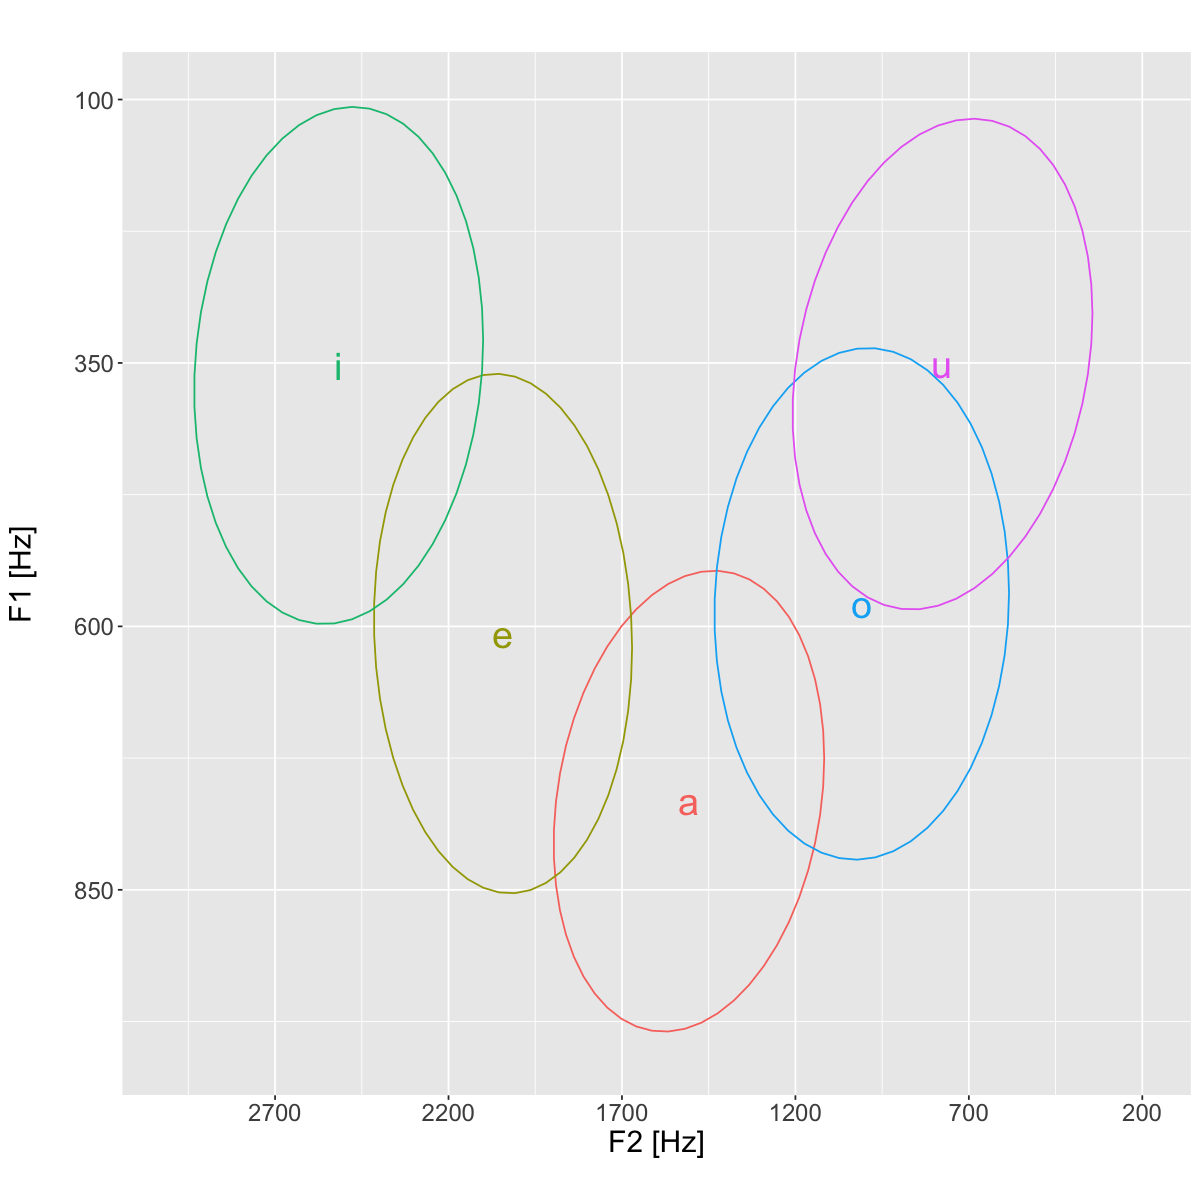

In [60]:
options(repr.plot.width=10, repr.plot.height=10)

plt <- ggplot(data=means, aes(x=meanF2, y=meanF1, color=vowel, label=vowel))+
geom_text(size=8)+
scale_x_reverse(
    position='bottom',
    breaks=seq(200, 3000, 500))+
scale_y_reverse(
    position='left',
    breaks=seq(100, 1000, 250))+
labs(
    x='F2 [Hz]\n',
    y='F1 [Hz]\n',
    title='')+
stat_ellipse(data=vowels, aes(x=F2, y=F1), type='norm')+
coord_cartesian(
    xlim=c(3000, 200),
    ylim=c(1000, 100))+
theme(
    legend.position='none',
    plot.title=element_text(hjust=0.5),
    text=element_text(size=18))
plt

---